In [62]:
# Project CLustering
# AllLife Credit Card Customer Segmentation
# How many different segments of customers are there?
# How are these segments different from each other?
# What are your recommendations to the bank on how to better market to and service these customers?

# Customer key - Identifier for the customer
# Average Credit Limit - Average credit limit across all the credit cards
# Total credit cards - Total number of credit cards
# Total visits bank - Total number of bank visits
# Total visits online - total number of online visits
# Total calls made - Total number of calls made by the customer

# Perform univariate analysis on the data to better understand the variables at your disposal and
#   to get an idea about the no of clusters. Perform EDA, create visualizations to explore data. (10 marks)--done
# Properly comment on the codes, provide explanations of the steps taken in the notebook and 
#         conclude your insights from the graphs. (5 marks) --done
# Execute K-means clustering use elbow plot and analyse clusters using boxplot (10 marks)--done
# Execute hierarchical clustering (with different linkages) with the help of dendrogram 
#               and cophenetic coeff. Analyse clusters formed using boxplot (15 marks) 
# Calculate average silhouette score for both methods. (5 marks) 
# Compare K-means clusters with Hierarchical clusters. (5 marks) 
# Analysis the clusters formed, tell us how is one cluster different from another and answer all the key questions. (10 marks) 

In [84]:
import pandas as pd # import panda library
import numpy as np  # import numpy library

import matplotlib.pylab as plt # importing matplotlibrary
%matplotlib inline  

import seaborn as sns  # importing seaborn library - Matplot and seaborn libraries used for visualizations

from sklearn.cluster import KMeans # import KMeans clustering algorithms from Scikit learn

from scipy.stats import zscore  # importing zscore for standardizing the variable

from scipy.spatial.distance import cdist # find distance between clusters

from sklearn.cluster import AgglomerativeClustering # importing hierarchial clustering

from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore') # avoid poping up of warning

In [89]:
data=pd.read_excel("Credit_Card _Customer_Data.xlsx") # reading the excel file to pandas dataframe'data'
data1=pd.read_excel("Credit_Card _Customer_Data.xlsx") # reading the excel file to pandas dataframe'data'

In [65]:
data.head() # understanding data at high level - top 5 rows

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [67]:
print(data.info())# information about a DataFrame including the index dtype and columns, non-null values and memory usage.
# All column type are integers
print(data.shape) # 660 rows with 8 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB
None
(660, 7)


In [68]:
data.describe() # understanding data better - SI_No and Customer Key is not significant
# - Average Credit limit for individual  - min 3000, max - 200,000, also data distribution across various percentiles
# number of credit card possesed by an individual is from 1 to 10, average being - 5
# customer visit to bank - customers with zero visit to maximum of 5 visits, average of around  2 visits 
# customer online visit - customers with zero visit to maximum of 15 visits, average of around 3 visits 
# customer calls made - there are customer with no calls made as well as to maximum of 10 calls made, average around 4 calls

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [70]:
data.skew() # understanding the skewness in the data set

# Seems like high skewness in average_credit_limit data and no: of online visits

Sl_No                  0.000000
Customer Key           0.051462
Avg_Credit_Limit       2.202396
Total_Credit_Cards     0.144879
Total_visits_bank      0.141896
Total_visits_online    2.225607
Total_calls_made       0.658905
dtype: float64

In [71]:
# undertanding more about credit card
data.groupby(['Total_Credit_Cards']).size()
# lower percentage have number of  credit cards 8 or above
# Higher percentage of population posses credit cards 4, 6 or 7.

Total_Credit_Cards
1      59
2      64
3      53
4     151
5      74
6     117
7     101
8      11
9      11
10     19
dtype: int64

In [72]:
# undertanding more about visit to bank
data.groupby(['Total_visits_bank']).size() 

# Almost equal proportion of people visits the bank 0, 1, 2,3,4,5 times...
# Around 15 % not visited the Bank

Total_visits_bank
0    100
1    112
2    158
3    100
4     92
5     98
dtype: int64

In [73]:
# undertanding more about online visiting

data.groupby(['Total_visits_online']).size()

# Around 20 % not used online banking

Total_visits_online
0     144
1     109
2     189
3      44
4      69
5      54
6       1
7       7
8       6
9       4
10      6
11      5
12      6
13      5
14      1
15     10
dtype: int64

In [14]:
# undertanding more about calls made by the customer
data.groupby(['Total_calls_made']).size()

# 15 % of customer not made any calls to Bank
# 55 % of customers are in the range of making 1,2,3 or 4 calls

Total_calls_made
0      97
1      90
2      91
3      83
4     108
5      29
6      39
7      35
8      30
9      32
10     26
dtype: int64

In [75]:
correl=data.corr()
correl
corr=data.corr()
print(corr)
corr[(corr>0.70) | (corr<-0.7)] 
# No correlation between variables observed.

                        Sl_No  Customer Key  Avg_Credit_Limit  \
Sl_No                1.000000      0.052886          0.677962   
Customer Key         0.052886      1.000000          0.068604   
Avg_Credit_Limit     0.677962      0.068604          1.000000   
Total_Credit_Cards   0.739329     -0.010281          0.608860   
Total_visits_bank    0.406438     -0.000560         -0.100312   
Total_visits_online  0.033916      0.022506          0.551385   
Total_calls_made    -0.684125      0.005968         -0.414352   

                     Total_Credit_Cards  Total_visits_bank  \
Sl_No                          0.739329           0.406438   
Customer Key                  -0.010281          -0.000560   
Avg_Credit_Limit               0.608860          -0.100312   
Total_Credit_Cards             1.000000           0.315796   
Total_visits_bank              0.315796           1.000000   
Total_visits_online            0.167758          -0.551861   
Total_calls_made              -0.651251      

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,1.000000,NaN,NaN,0.739329,NaN,NaN,NaN
Customer Key,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Avg_Credit_Limit,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Total_Credit_Cards,0.739329,NaN,NaN,1.000000,NaN,NaN,NaN
Total_visits_bank,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Total_visits_online,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Total_calls_made,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [76]:
data_attr=data.iloc[:,2:] # taking out SI number and customer key which has no significance in clustering data

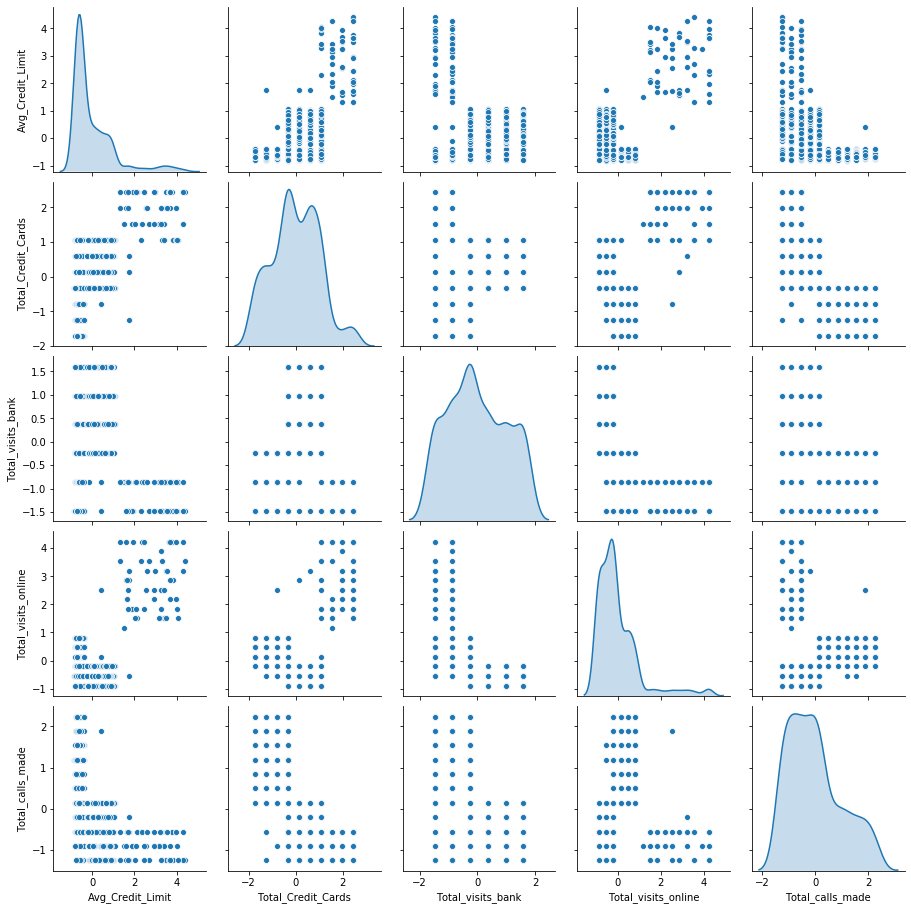

In [16]:
data_scaled=data_attr.apply(zscore) # Scaling the data in columns to standardize to different unit of values
sns.pairplot(data_scaled,diag_kind='kde') # pair plot to understand the relation between columns

# No much significance can be found.
# kde distribution shows rough understanding of how many clusters required,
# it seems may be no: of optimal clusters will be 3 or 4.

Text(0.5, 1.0, 'Selecting k with Elbow Method')

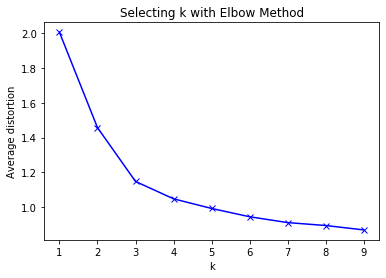

In [17]:
# finding optimal number of clusters using the Elbow method

clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(data_scaled)
    prediction = model.predict(data_scaled)
    meanDistortions.append(sum(np.min(cdist(data_scaled,model.cluster_centers_, 'euclidean'),axis=1)) /data_scaled.shape[0])

plt.plot(clusters,meanDistortions,'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with Elbow Method')

In [ ]:
# By Using the Elbow method, we could see sharp bend for k=3, hence optimal number of cluster for the data is 3.

In [128]:
#starting with K=3
final_model=KMeans(3)
final_model.fit(data_scaled)
prediction=final_model.predict(data_scaled)

#Append the Prediction
data["Group"]=prediction
data_scaled["Group"]=prediction
print("Groups Assigned : \n")
data.head()


Groups Assigned : 



,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Group
0,1,87073,100000,2,1,1,0,2
1,2,38414,50000,3,0,10,9,0
2,3,17341,50000,7,1,3,4,2
3,4,40496,30000,5,1,1,4,2
4,5,47437,100000,6,0,12,3,1


In [129]:
data_clust = data_scaled.groupby(['Group'])
print(data_clust.mean())

       Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
Group                                                            
0             -0.595796           -1.059623          -0.901518   
1              2.831764            1.862226          -1.105763   
2             -0.021062            0.373690           0.666395   

       Total_visits_online  Total_calls_made  
Group                                         
0                 0.322997          1.148109  
1                 2.827319         -0.874330  
2                -0.553672         -0.553005  


In [132]:
data_clust2 = data.groupby(['Group']) # Working on original Data set
print(data_clust2.mean())

            Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
Group                                                                   
0      117.857143  55239.830357      12174.107143            2.410714   
1      611.280000  56708.760000     141040.000000            8.740000   
2      417.528497  54881.329016      33782.383420            5.515544   

       Total_visits_bank  Total_visits_online  Total_calls_made  
Group                                                            
0               0.933036             3.553571          6.870536  
1               0.600000            10.900000          1.080000  
2               3.489637             0.981865          2.000000  


In [ ]:
# understanding cluster mean date, we could see remarkable difference in various cluster on each column attribute

# Group 0 - Credit limit- ~12000, Credit cards~ 2, Bank Visit~1, Online Visit~4, customer calls ~ 7
# Group 1 - Credit limit- ~34000, Credit cards~ 6, Bank Visit~4, Online Visit~1, customer calls ~ 2
# Group 2 - Credit limit-~140000, Credit cards~ 9, Bank Visit~1, Online Visit~11, customer calls ~ 1

# Group 0 - uses less number  of credit cards, carrying low credit limit, use online mode, prefer telephonic interaction for 
#    banking needs. Credit spending seems less, may be less potential to get more business

# Group 1 - uses many number of credit cards, carrying sufficient credit limits, prefer bank visit or employee interaction at
#   Bank for banking needs. Have potential to get more business. Best way to target these audience
#   while on their visit to Bank

# Group 2 - uses large number of credit cards, high purchasing capacity, prefer online mode for Banking needs.
#   have potential to get more business. Best way to target these audience via online modes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000236631798C8>,
      dtype=object)

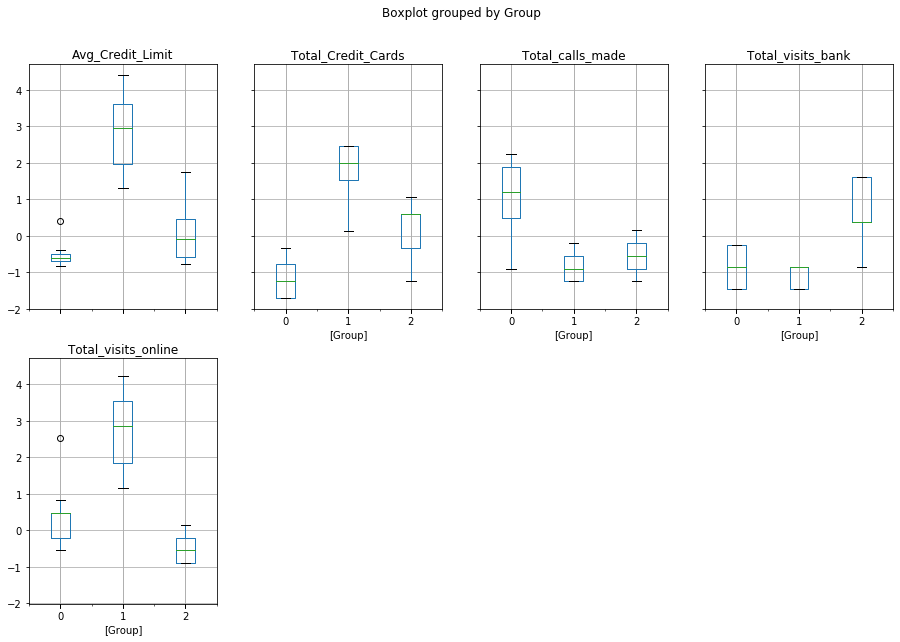

In [133]:
# Box Plot for K- Means Clustering
data_scaled.boxplot(by='Group',layout=(2,4),figsize=(15,10))

In [ ]:
# box plot shows attributes belong to different groups how much they differ in values, also showning areas 
# where group have few points in common. 
# example- groups clearly distinguish on number of visits online, average credit limit and number of credit cards owned.

In [83]:
# Calculating the averge Silhouette score

silhouette_avg = silhouette_score(data_scaled, prediction)
silhouette_avg

# Silhouette value shows how similar in an object is to its own cluster compared to other clusters. Value of 0.5 looks ok.


0.5397786437631975

In [ ]:
# Hierarchial Clustering

In [94]:
data1.head()
data1_attr=data1.iloc[:,2:]
data1_attr.head()
data1_scaled=data1_attr.apply(zscore)


In [134]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
model.fit(data1_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3)

In [135]:
data1_scaled['labels'] = model.labels_
data1['labels']=model.labels_
data1.head() # Adding the labels found to the data1 set

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,1,87073,100000,2,1,1,0,0
1,2,38414,50000,3,0,10,9,2
2,3,17341,50000,7,1,3,4,0
3,4,40496,30000,5,1,1,4,0
4,5,47437,100000,6,0,12,3,1


In [136]:
data1_clust = data1_scaled.groupby(['labels'])

In [137]:
print(data1_clust.mean()) # Printing cluster mean found by hierarchial clustering on scaled data

        Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
labels                                                            
0              -0.022902            0.371882           0.664034   
1               2.831764            1.862226          -1.105763   
2              -0.595179           -1.062913          -0.904453   

        Total_visits_online  Total_calls_made  
labels                                         
0                 -0.552775         -0.551200  
1                  2.827319         -0.874330  
2                  0.325372          1.152605  


In [138]:
data1_clust = data1.groupby(['labels'])
print(data1_clust.mean()) # Printing cluster mean found by hierarchial clustering

             Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
labels                                                                   
0       417.260982  54925.966408      33713.178295            5.511628   
1       611.280000  56708.760000     141040.000000            8.740000   
2       116.977578  55163.973094      12197.309417            2.403587   

        Total_visits_bank  Total_visits_online  Total_calls_made  
labels                                                            
0                3.485788             0.984496          2.005168  
1                0.600000            10.900000          1.080000  
2                0.928251             3.560538          6.883408  


In [140]:
print(data_clust2.mean()) # Printing cluster mean found by K Means clustering

            Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
Group                                                                   
0      117.857143  55239.830357      12174.107143            2.410714   
1      611.280000  56708.760000     141040.000000            8.740000   
2      417.528497  54881.329016      33782.383420            5.515544   

       Total_visits_bank  Total_visits_online  Total_calls_made  
Group                                                            
0               0.933036             3.553571          6.870536  
1               0.600000            10.900000          1.080000  
2               3.489637             0.981865          2.000000  


# Comparison of cluster by Analysing mean

## Both Cluster mean values are almost same, hence no difference in the way cluster has been formed in both ways - k mean & hierarchial clustering review output of above two cells

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023663842AC8>,
      dtype=object)

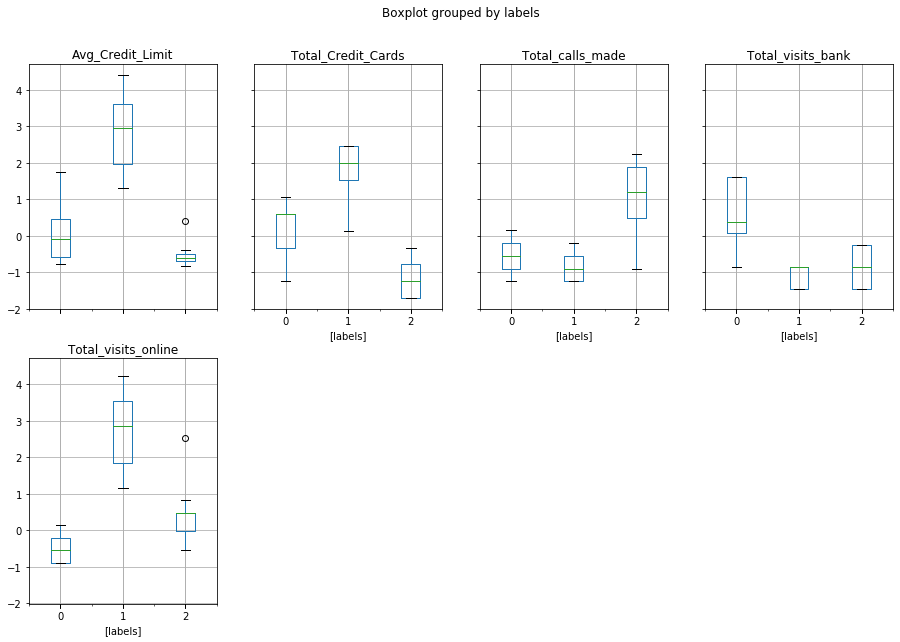

In [141]:
data1_scaled.boxplot(by='labels',layout=(2,4),figsize=(15,10))

In [ ]:
# Just like K means clustering, Hierachial clustering provide similar slots. box plot shows attributes belong to different
# groups how much they differ in values, also showning areas where group have few points in common. 
# example- groups clearly distinguish on number of visits online, average credit limit and number of credit cards owned.

In [142]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [143]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [151]:
# Dendogram using linkage method - 'average'
Z = linkage(data1_scaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(data1_scaled))
c


0.9252387749820263

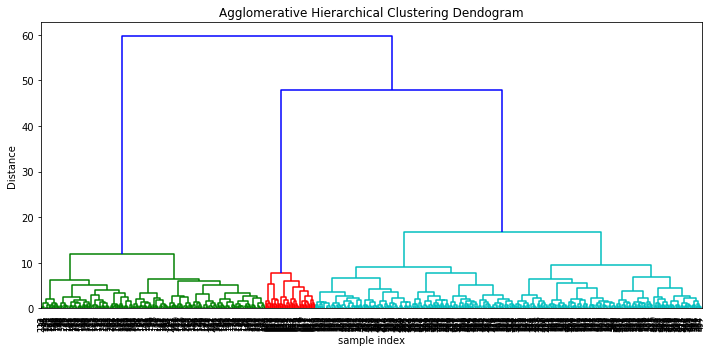

In [155]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [163]:
# Dendogram using linkage method - 'complete'
Z = linkage(data1_scaled, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(data1_scaled))

c

0.9181204166982053

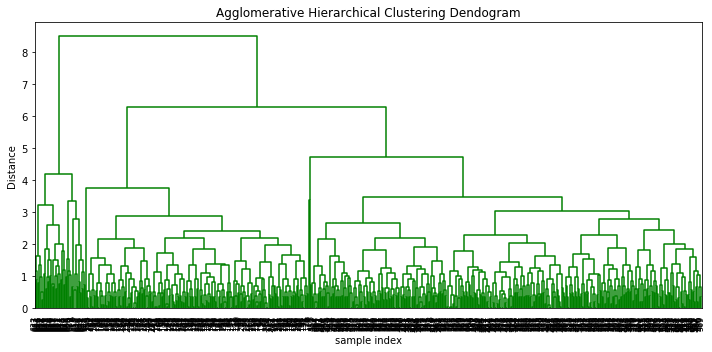

In [164]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [165]:
# Dendogram using linkage method - 'ward'
Z = linkage(data1_scaled, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(data1_scaled))

c

0.8170227112271451

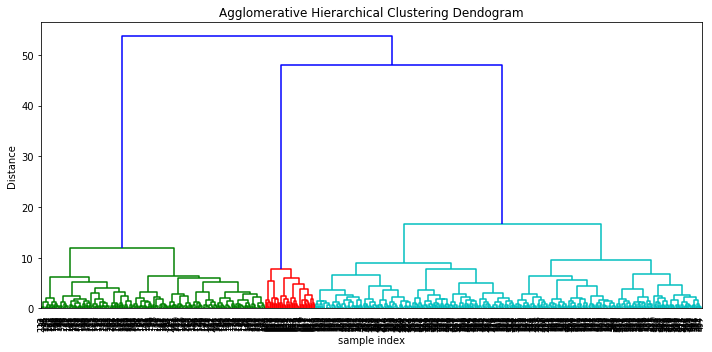

In [54]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [169]:
# Dendogram using linkage method - 'single'
Z = linkage(data1_scaled, metric='euclidean', method='single')
c, coph_dists = cophenet(Z , pdist(data1_scaled))

c

0.8464568634426607

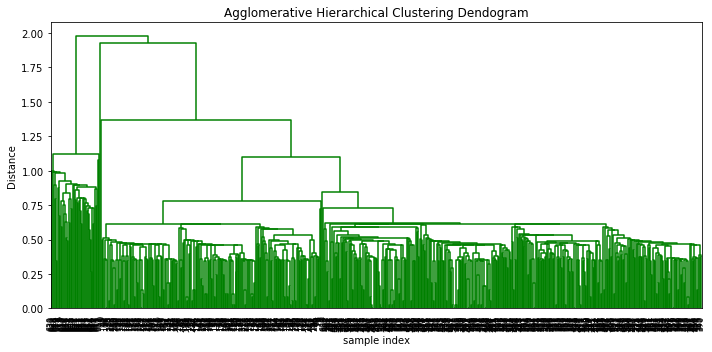

In [57]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [170]:
# Dendogram using linkage method - 'centroid'
Z = linkage(data1_scaled, metric='euclidean', method='centroid')
c, coph_dists = cophenet(Z , pdist(data1_scaled))

c

0.9211361950893145

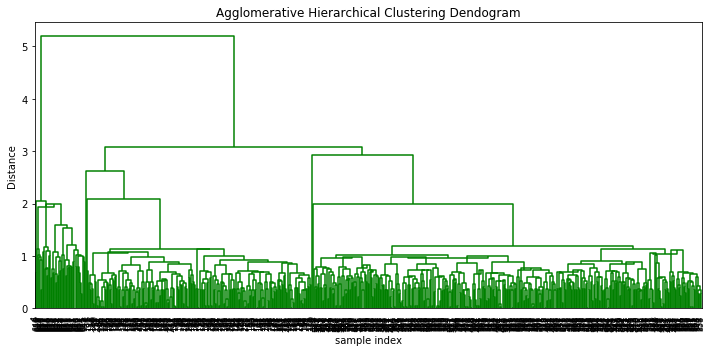

In [61]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [ ]:
# cophentic coefficient varies from 82(linkage method - ward) to 92 (linkage method - centroid & average) based on the 
# linkage method. ALso distance at which cluster joined is very different in different linkages

In [ ]:
# How many different segments of customers are there?
# Arrived in 3 customer segments after analysing the data.

# How are these segments different from each other?
# understanding cluster mean date, we could see remarkable difference in various cluster on each column attribute
# Group 0 - Credit limit- ~12000, Credit cards~ 2, Bank Visit~1, Online Visit~4, customer calls ~ 7
# Group 1 - Credit limit- ~34000, Credit cards~ 6, Bank Visit~4, Online Visit~1, customer calls ~ 2
# Group 2 - Credit limit-~140000, Credit cards~ 9, Bank Visit~1, Online Visit~11, customer calls ~ 1


# What are your recommendations to the bank on how to better market to and service these customers?

# Group 0 - uses less number  of credit cards, carrying low credit limit, use online mode, prefer telephonic interaction for 
#    banking needs. Credit spending seems less, may be less potential to get more business

# Group 1 - uses many number of credit cards, carrying sufficient credit limits, prefer bank visit or employee interaction at
#   Bank for banking needs. Have potential to get more business. Best way to target these audience
#   while on their visit to Bank

# Group 2 - uses large number of credit cards, high purchasing capacity, prefer online mode for Banking needs.
#   have potential to get more business. Best way to target these audience via online modes